# Problem 1 - Answers

To start with we solve the undamped simple harmonics oscillator as detailed in lecture notes 3, and end up with:

$$ U = \frac{1}{2}m\omega_0^2A^2\cos^2(\omega_0t + \phi) \\ Ke  =  \frac{1}{2}m\omega_0^2A^2\sin^2(\omega_0t + \phi) \\ E = U + Ke$$

Implementing this in python, we end up with:

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set variables
m = 1
k = 1
w = np.sqrt(k/m)
A = 0.01
phi = 0
t = np.linspace(0,np.pi*4,500)

In [3]:
# write out the equations
U = 0.5*m*(w**2)*(A**2)*(np.cos(w*t+phi)**2)
KE = 0.5*m*(w**2)*(A**2)*(np.sin(w*t+phi)**2)
E = U+KE

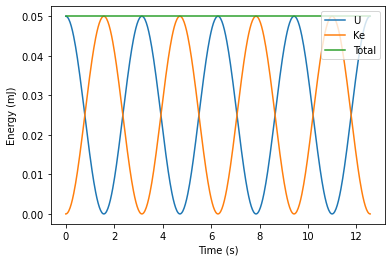

In [4]:
# plot the results
plt.plot(t,U*1000,t,KE*1000,t,E*1000)
plt.xlabel('Time (s)')
plt.ylabel('Energy (mJ)')
plt.legend(('U', 'Ke', 'Total'),loc = 'upper right')
plt.show()

Once we introduce damping however, things get a bit more complicated. The general form of the equation of motion for a damped harmonic oscillator is (see lecture notes 4):

$$ \ddot \Psi + \gamma \dot \Psi + \omega_0^2 \Psi = 0$$

This differential equation is soluble, and gives potential and kinetic energies of:

$$ U = \frac{1}{2}m\omega_0^2A^2e^{-\gamma t}\cos^2(\omega_dt + \phi) \\ Ke  =  \frac{1}{8}mA^2e^{-\gamma t}(\gamma\cos(\omega_dt + \phi) + 2\omega_d\sin(\omega_dt + \phi))^2 \\ \omega_d = \sqrt{\omega_0^2 - (\frac{\gamma}{2})^2}$$

which can be implemented in python like so:

In [5]:
# extra constants
gamma = 0.4
wd = np.sqrt(w**2 - (gamma/2)**2)

In [6]:
# new equations
U = 0.5*m*(A**2)*(w**2)*np.exp(-gamma*t)*(np.cos(wd*t + phi)**2)
KE = (1/8)*m*(A**2)*np.exp(-gamma*t)*(gamma*np.cos(wd*t + phi) + 2*wd*np.sin(wd*t + phi))**2
E = U+KE

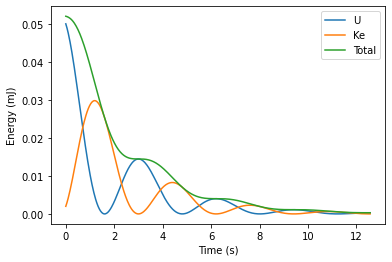

In [7]:
# plot solutions
plt.plot(t,U*1000,t,KE*1000,t,E*1000)
plt.xlabel('Time (s)')
plt.ylabel('Energy (mJ)')
plt.legend(('U', 'Ke', 'Total'),loc = 'upper right')
plt.show()

However, not all differential equations are solvable analytically. This is where one of the great strengths of computers come in, as they can solve sets of differential equations numerically, so the explicit form of the solutions never has to be worked out. 

One common form of numerical solution is called the fourth order Runge-Kutta method. It is useable on a set of equations of the form $\frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r},t)$, where $\mathbf{r}$ is a vector of coordinates $x,y,z,...$ and $\mathbf{f}$ is the corresponding vector of time dependent functions $\mathit{f_x}(\mathbf{r},t), \mathit{f_y}(\mathbf{r},t), \mathit{f_z}(\mathbf{r},t),...$ where $\mathit{f_x}(\mathbf{r},t) = \frac{dx}{dt}$. (note that this is effectively just a short way of writing a set of simulntaneous first order differential equations). 

Then for a time interval $h$ and initial values $t_n$ and $\mathbf{r}_n$ we take $t_{n+1} = t_n + h$ and $\mathbf{r}_{n+1} = \mathbf{r}_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$. The $k$'s are given by:

$$ k_1 = h\mathbf{f}(\mathbf{r}_n,t_n) \\ k_2 = h\mathbf{f}(\mathbf{r}_n + \frac{k_1}{2},t_n + \frac{h}{2}) \\ k_3 = h\mathbf{f}(\mathbf{r}_n + \frac{k_2}{2},t_n + \frac{h}{2}) \\ k_4 = h\mathbf{f}(\mathbf{r}_n + k_3,t_n + h)$$ 

and are equivalent to taking the slope of the line at the beginning, two in the middle and one again at the end, with guesses at the coordinates given by the previous slope. This is then repeated for as many points over the desired interval as the step size allows.


We can rewrite the general equation as $\frac{dv}{dt} = -\gamma\frac{dx}{dt} + \omega_0^2x$. As $\frac{dx}{dt} = v$ this then gives us the set of simulntaneous equations $\mathbf{r} = (x,v)$, $\mathbf{f} = (\frac{dx}{dt},\frac{dv}{dt})$.

This can be implemented as a function in python:

In [8]:
def f(r,t):
    x = r[0]
    vx = r[1]
    fx = vx
    fvx = -(gamma*vx + w**2*x)
    return np.array([fx,fvx])

The Runge-Kutta method can be implemented as follows:

In [9]:
# more constants - note t is redefined now we need the step size to be explicit
end = np.pi*4
start = 0
N = 500
h = (end - start)/N
t_2 = np.arange(start,end,h)

In [10]:
# Runge-Kutta method - loop over t, append old x and v to the array, calculate the 
# new ones and replace the old points in the r 
def rungekutta(r,t):
    xpoints = []
    vpoints = []
    for i in t:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = h * f(r, i)
        k2 = h * f(r + 0.5 * k1, i + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, i + 0.5 * h)
        k4 = h * f(r + k3, i + h)
        r = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return np.array([xpoints,vpoints])

In [11]:
# set initial conditions, and solve for U and Ke
r = np.array([0.01,0])
rsol = rungekutta(r,t_2)

U_2 = 0.5*m*(w**2)*rsol[0]**2
KE_2 = 0.5*m*rsol[1]**2
E_2 = U_2 + KE_2

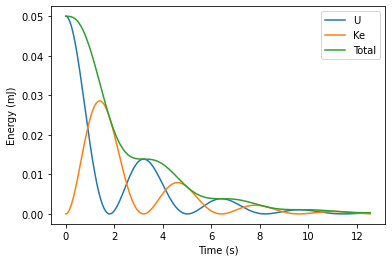

In [12]:
#plot
plt.plot(t_2,U_2*1000,t_2,KE_2*1000,t_2,E_2*1000)
plt.xlabel('Time (s)')
plt.ylabel('Energy (mJ)')
plt.legend(('U', 'Ke', 'Total'),loc = 'upper right')
plt.show()